# Team Green Project:  Scrub Global Temperature File
### Note:  Temperatures are in Celsius

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# File to Load
temp_data_to_load = "data/GlobalTemperatures.csv"

# Read Temperature Data
temp_data = pd.read_csv(temp_data_to_load)

In [2]:
temp_data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Create a new dataset with only dt, LandAndOceanAverageTemperature, and LandAndOceanAverageTemperatureUncertainty
temp_data_1 = temp_data[['dt', 'LandAndOceanAverageTemperature']]
temp_data_1.head()

,dt,LandAndOceanAverageTemperature
0,1750-01-01,NaN
1,1750-02-01,NaN
2,1750-03-01,NaN
3,1750-04-01,NaN
4,1750-05-01,NaN


In [6]:
# Drop rows with NaN
temp_data_2 = temp_data_1.dropna()
temp_data_2.head()

,dt,LandAndOceanAverageTemperature
1200,1850-01-01,12.833
1201,1850-02-01,13.588
1202,1850-03-01,14.043
1203,1850-04-01,14.667
1204,1850-05-01,15.507


In [7]:
# Disable the SettingWithCopyWarning warning
pd.options.mode.chained_assignment = None
# Create a Year Column
temp_data_2['Year'] = temp_data_2.dt.str[:4]

# Create another temp. column for min or max number
temp_data_2['Min Avg Temp'] = temp_data_2['LandAndOceanAverageTemperature']

# Convert dt to datetime format
temp_data_2['dt'] = pd.to_datetime(temp_data_2['dt'])
temp_data_2.head()

,dt,LandAndOceanAverageTemperature,Year,Min Avg Temp
1200,1850-01-01,12.833,1850,12.833
1201,1850-02-01,13.588,1850,13.588
1202,1850-03-01,14.043,1850,14.043
1203,1850-04-01,14.667,1850,14.667
1204,1850-05-01,15.507,1850,15.507


In [12]:
# Group by Year and get average of both numerical columns
#temp_data_3 = temp_data_2.groupby('Year').min('Min Avg Temp').max('LandAndOceanAverageTemperature').reset_index()
temp_data_3 = temp_data_2.groupby('Year').agg({'Min Avg Temp':'min', 'LandAndOceanAverageTemperature':'max'})[['Min Avg Temp','LandAndOceanAverageTemperature']].reset_index()
temp_data_3.rename(columns={'LandAndOceanAverageTemperature':'Max Avg Temp'}, 
                 inplace=True)
temp_data_3.head()

,Year,Min Avg Temp,Max Avg Temp
0,1850,12.833,16.783
1,1851,13.245,16.831
2,1852,13.231,16.984
3,1853,13.143,16.999
4,1854,12.983,16.775


In [13]:
# Save Data to .csv
# Save scrubbed file to .csv
temp_data_3.to_csv(r'Data/temp_data-AllYears-Min-Max.csv', index = False, header=True)

In [15]:
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

#Data
data = temp_data_3  # load data set
X = data.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


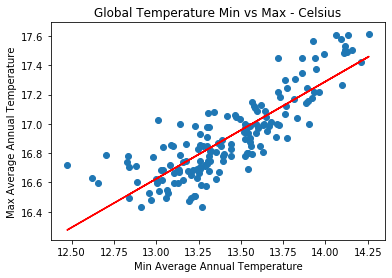

In [16]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Min Average Annual Temperature')
plt.ylabel('Max Average Annual Temperature')
plt.title('Global Temperature Min vs Max - Celsius')
plt.show()
